# Chronic illness: symptoms, treatments and triggers

# Introduction
**This project is part of Udacity's Data Analyst Nanodegree Programm. <br> The dataset was aquired from kaggle.com. The website Flaredown tracks chronic illness symptoms and provided the data I use in this project. And has more than 3 million rows that would not be usable using non programmatic approaches. Sources are marked with (n) and linked under Sources at the end of the notebook.**

#### About the data (from Flaredown)

Instead of coupling symptoms to a particular illness, Flaredown asks users to create their unique set of conditions, symptoms and treatments (“trackables”). They can then “check-in” each day and record the severity of symptoms and conditions, the doses of treatments, and “tag” the day with any unexpected environmental factors.

**User**: includes an ID, age, sex, and country.

**Condition**: an illness or diagnosis, for example Rheumatoid Arthritis, rated on a scale of 0 (not active) to 4 (extremely active).

**Symptom**: self-explanatory, also rated on a 0–4 scale.

**Treatment**: anything a patient uses to improve their symptoms, along with an optional dose, which is a string that describes how much they took during the day. For instance “3 x 5mg”.

**Tag**: a string representing an environmental factor that does not occur every day, for example “ate dairy” or “rainy day”.

**Food**: food items were seeded from the publicly-available USDA food database. Users have also added many food items manually.

**Weather**: weather is pulled automatically for the user's postal code from the Dark Sky API. Weather parameters include a description, precipitation intensity, humidity, pressure, and min/max temperatures for the day.

If users do not see a symptom, treatment, tag, or food in our database (for instance “Abdominal Pain” as a symptom) they may add it by simply naming it. This means that the data requires some cleaning, but it is patient-centered and indicates their primary concerns.

### Table of Contents

- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Explore](#explore)
    - [Univariate](#uni)
    - [Bi- and Multivariate](#bi)
- [Sources](#sources)

In [1]:
import requests
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

% matplotlib inline

<a id='gather'></a>
# Gather

This dataset was downloaded from **kaggle.com** and provided by **Flaredown**. Flaredown is an app that tracks symptoms, treatments, environmental triggers on a daily basis for each patient. This is a large dataset that is a perfect fit for this project. The link to the dataset can be found under Sources at the end of the notebook.

In [2]:
#Create dataframe from .csv file
df = pd.read_csv('fd-export.csv')

C:\Users\march\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='assess'></a>
# Assess

In [3]:
df.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4


In [4]:
df.shape

(3487633, 9)

In [5]:
df['user_id'].value_counts()

QEVuQwEAlNMIH8RXhjZvx6HzoW8iXQ==    40858
QEVuQwEAPEoXGFKArZ9POVOtEufMcA==    31124
QEVuQwEAVaa7SCCq9wZKg//dpv5Xyw==    29187
QEVuQwEA+ncvJRvfo6PtArpLX1N8xA==    23343
QEVuQwEAiCzSfGQR0NefHujW9fVI/A==    22677
QEVuQwEAgu4h6TUSURerctVPXKDehA==    18864
QEVuQwEAm3m1nkaROXRyPkH4ryfv2Q==    17947
QEVuQwEAbhTp/7opHf8bz+aYaPb9qQ==    17668
QEVuQwEAizd84bshNIHwS6anVQXKjQ==    17139
QEVuQwEATILrJKGLQqxekeTVDtjrGw==    16700
QEVuQwEA/lxYwRG3fa1UMAl5GwTn0g==    15437
QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==    14420
QEVuQwEAeRrt2mYktI3Fokcu7zW5UA==    12879
QEVuQwEAhBn9PfvMceuuky/L/gXfNw==    12292
QEVuQwEAmS9U3RAfpAoxDeyaHuHfNQ==    11503
QEVuQwEAu8LWk782hBZqsGTbLIbeAQ==    11360
QEVuQwEAdJD0HMVdiv9CM9bdkilPMg==    11096
QEVuQwEAvP5LbPUDEotVGUBWVXPcnw==    10411
QEVuQwEAPH7K/YqW6kqWOoH6jX2g7Q==    10229
QEVuQwEAuYwnxdBUT/jPkbfRDRMLag==     9372
QEVuQwEAU+4zRMGrZQae1TQJOJs6Jw==     9339
QEVuQwEAzZZJytHyyKA2iqJCbNIhLg==     9238
QEVuQwEAgjSid5t5RhpUyf83z5+3vw==     9231
QEVuQwEArbZ+iIlSEEE6tlJ31Z0tzg==  

In [6]:
#general information about the dataset: datatype, entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487633 entries, 0 to 3487632
Data columns (total 9 columns):
user_id            object
age                float64
sex                object
country            object
checkin_date       object
trackable_id       object
trackable_type     object
trackable_name     object
trackable_value    object
dtypes: float64(1), object(8)
memory usage: 239.5+ MB


In [7]:
#number of unique entries for each parameter
df.nunique()

user_id             22071
age                    97
sex                     4
country               141
checkin_date         1164
trackable_id       120820
trackable_type          7
trackable_name      62681
trackable_value      8627
dtype: int64

In [8]:
df['country'].value_counts()

US    2163066
GB     494058
CA     245519
AU     217744
NZ      38210
NL      37168
DE      36118
SE      25059
FR      20967
NO      17476
BE      17263
CH      10995
ZA      10268
IE       7648
FI       7215
AF       6736
UY       6371
AT       5737
UM       5361
ES       4794
SG       4281
IS       3730
BR       2976
DK       2725
DZ       2264
JP       2251
HK       2241
JE       1908
PK       1889
PE       1861
       ...   
WS         12
MO         12
BN         12
PF         12
BF         11
MT         10
BS         10
LV         10
MG          9
ME          7
QA          6
TZ          6
BT          5
LK          5
CI          5
SO          4
MK          4
GH          4
KZ          3
UZ          3
ZM          2
ET          2
VU          2
VN          2
LY          2
SD          2
UG          2
IQ          1
MV          1
LR          1
Name: country, Length: 141, dtype: int64

In [9]:
df[df.trackable_type == 'Condition'].trackable_value.value_counts()

2    124228
1    121074
0    112098
3     89921
4     58140
Name: trackable_value, dtype: int64

In [10]:
df.trackable_value.value_counts()

0                                     577863
1                                     511496
2                                     482058
3                                     322882
4                                     195655
partly-cloudy-day                      35854
rain                                   23958
0.0                                    23854
partly-cloudy-night                    17864
clear-day                              13468
0.0001                                 11095
1017.0                                  6665
1016.0                                  6624
0.0002                                  6272
1015.0                                  6143
72.0                                    6079
70.0                                    6062
73.0                                    6040
69.0                                    6029
1014.0                                  6006
1018.0                                  5998
74.0                                    5905
75.0      

In [11]:
df['age'].value_counts()

 26.0        149984
 25.0        124471
 22.0        123222
 33.0        123017
 24.0        120243
 37.0        118549
 34.0        118293
 27.0        114471
 20.0        109667
 32.0        106673
 31.0        104949
 46.0         99872
 19.0         98737
 28.0         97887
 29.0         96967
 30.0         95499
 35.0         91637
 39.0         87857
 23.0         82596
 40.0         72603
 38.0         71053
 21.0         71001
 36.0         68611
 43.0         63030
 18.0         61335
 41.0         61238
 44.0         59752
 47.0         56841
 55.0         47411
 48.0         47157
              ...  
 2017.0         347
 8.0            229
 5.0            194
 6.0            190
 75.0           147
 74.0           129
 7.0            128
 77.0           113
 71.0           107
 79.0            61
 72.0            56
 98.0            41
-1.0             32
 89.0            32
 784.0           28
 73.0            23
 1941.0          21
 218.0           17
 828.0           17


In [12]:
df[df['trackable_type'] == 'Tag']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
26,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,1,Tag,tired,NaN
27,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,2,Tag,stressed,NaN
28,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,3,Tag,feels,NaN
33,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-14,13,Tag,good sleep,NaN
34,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-14,14,Tag,haircut,NaN
35,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-14,15,Tag,Derp,NaN
40,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-11,1,Tag,tired,NaN
41,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-11,10,Tag,ate breakfast,NaN
42,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-11,4,Tag,Went to work,NaN
43,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-06-11,11,Tag,Wrong about something,NaN


**Tidiness:**
- the column `trackable_type` could be split into multiple columns for: condition, symptom, weather and tag
- it would be nice to have one row per patient, but the date is a problem
- compute additional date something like a day 0 and then upwards to the last entry for the user, should lead to better comparability of the date for analysis, keep date nonetheless for longitudinal analysis

**Quality:**
- `user_id` is complex and non comprehensive, change to unique int
- unlikely and impossible values like 1 or negative in `age`
- wrong datatypes for `checkin_date`, and `trackable_value`
- the `trackable_type` tag is very heterogenetic, filtering might be possible

<a id='clean'></a>
# Clean

In [13]:
df_clean = df.copy()

**1. Define**<br>
Change the alphanumerical value from user_id to a unique integer for each user.

**1. Code**

In [14]:
#change user_id to categorical
df_clean['user_id'] = pd.Categorical(df_clean['user_id'])

In [15]:
#transforming them into category codes (1)
df_clean['user_id'] = df_clean.user_id.cat.codes

**1. Test**

In [16]:
df_clean.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,4728,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,11821,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,198,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,198,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,198,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4


**2. Define**<br>
Age has impossible values. Define and replace them with np.nan.

**2. Code**

In [17]:
df_clean['age'].describe()

count    3.270971e+06
mean     3.287049e+01
std      2.197340e+02
min     -1.966930e+05
25%      2.400000e+01
50%      3.200000e+01
75%      4.000000e+01
max      2.017000e+03
Name: age, dtype: float64

In [18]:
#Replace 0 values with NaN, alternative .fillna
df_clean['age'] = df_clean['age'].replace(0.0, np.nan)

#oldest human recorded Jeanne Calment of France (1875–1997) was 122 years old. Cut off above 122 (2)
df_clean.loc[df_clean['age'] > 122, 'age'] = np.nan

#Replace all value < 0 with NaN
df_clean.loc[df_clean['age'] < 0, 'age'] = np.nan

In [19]:
df_clean['age'] = df_clean['age'].fillna(0).astype(int)

**2. Test**

In [20]:
df_clean['age'].describe()

count    3.487633e+06
mean     3.084770e+01
std      1.395187e+01
min      0.000000e+00
25%      2.300000e+01
50%      3.100000e+01
75%      4.000000e+01
max      1.170000e+02
Name: age, dtype: float64

**3. Define**<br>
Change `checkin_date` to datetime and `trackable_value` to string.

**3. Code**

In [21]:
df_clean['checkin_date'] = pd.to_datetime(df_clean['checkin_date'])

In [22]:
#At first I thought categorical would be a good choice due to the pain index, but it prevented me from doing a lot of exploration 
df_clean['trackable_value'] = df_clean['trackable_value'].astype(str)

**3. Test**

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487633 entries, 0 to 3487632
Data columns (total 9 columns):
user_id            int16
age                int32
sex                object
country            object
checkin_date       datetime64[ns]
trackable_id       object
trackable_type     object
trackable_name     object
trackable_value    object
dtypes: datetime64[ns](1), int16(1), int32(1), object(6)
memory usage: 206.2+ MB


There are many NaN entries after cleaning. I purposly left all of them in the dataset but put them into np.nan. If there is an error during analysis I can easily change that later on. At this point I the data is sufficiently cleaned to start exploring it.

In [25]:
#saving new df
df_clean.to_csv('df_clean.csv')

<a id='explore'></a>
# Explore

In [24]:
#Define a base color to make exploration a little bit easier on the eyes
base_color = sns.color_palette()[0]

<a id='uni'></a>
### Univariate Exploration:

**1. Gender Distribution**

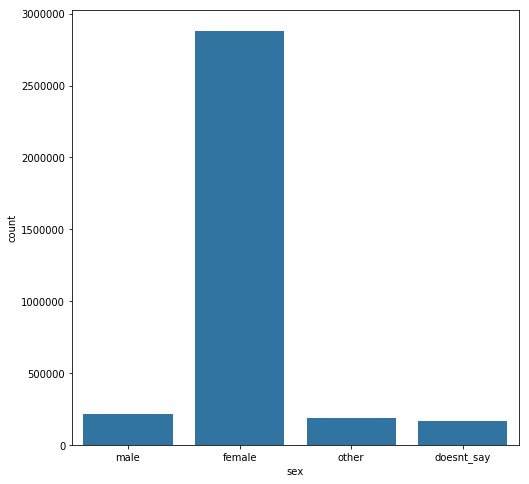

In [26]:
#Quick comparison of sex in the database
plt.figure(figsize = (8, 8))
sns.countplot(data = df_clean, x = 'sex', color = base_color);
plt.show();

This is rather interesting. Epidemiologically females might have a predisposition for some autoimmune diseases like SLE, MS and rheumatoid arthritis. But the amount of women that use this app outweigh known gender differences by a lot. 

**2. Comparing `trackable_type`**

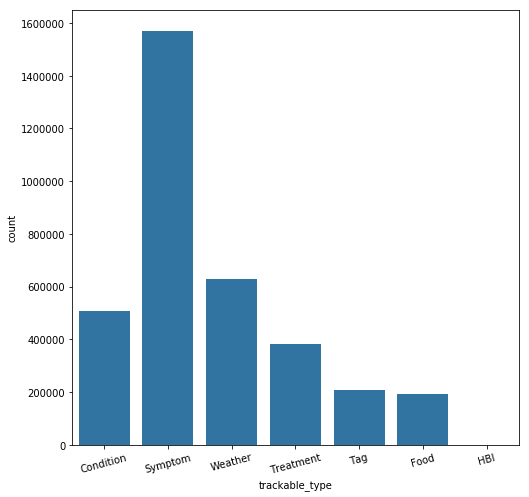

In [27]:
#Quick comparison of the trackable_types people used
plt.figure(figsize = (8, 8))
sns.countplot(data = df_clean, x = 'trackable_type', color = base_color)
plt.xticks(rotation=15)
plt.show()

I couldn't find any information on the HBI type. It doesn't seem to affect us anyways, but it would be nice to know.

**3. Top 10 Symptoms**

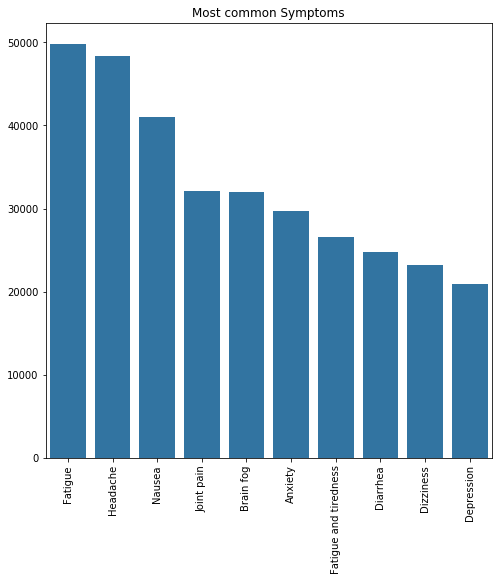

In [28]:
#Let's look at the most common symptoms
#Using .iloc for two reasons: 1. I can easily decide how many datapoints I want and 
#2. in conjunction with .value_counts() I get a list in ordered from highest to lowest value
x_value = df_clean[df_clean.trackable_type == "Symptom"].trackable_name.value_counts().iloc[0:10]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation = 90)
plt.title('Most common Symptoms')
plt.show()

**4. Pain Distribution**

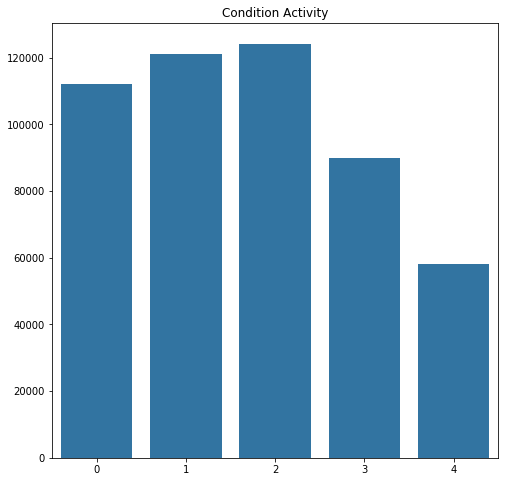

In [29]:
x_value = df_clean[df_clean['trackable_type'] == 'Condition'].trackable_value.value_counts().iloc[0:5]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.title('Condition Activity')
plt.show()

**5. Top 20 Treatments**

In [30]:
#Looking for the most used treatments
df_clean[df_clean.trackable_type == 'Treatment'].trackable_name.value_counts().head(20)

Ibuprofen        8821
Vitamin d        5176
Tramadol         4752
Magnesium        4565
Vitamin D3       4279
Paracetamol      4249
Gabapentin       4036
Multivitamin     3885
Amitriptyline    3666
Prednisone       3483
Omeprazole       3124
Naproxen         3079
Levothyroxine    3069
Cymbalta         3004
Probiotic        2797
Vitamin C        2783
Zyrtec           2728
Tylenol          2601
Plaquenil        2593
Melatonin        2592
Name: trackable_name, dtype: int64

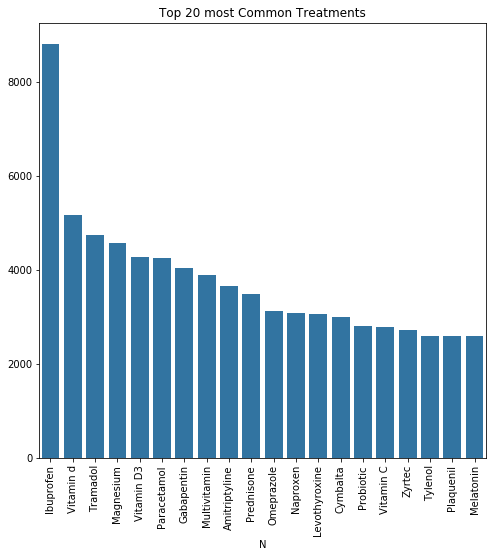

In [31]:
x_value = df_clean[df_clean.trackable_type == "Treatment"].trackable_name.value_counts().iloc[0:20]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation=90)
plt.xlabel('N')
plt.title("Top 20 most Common Treatments")
plt.show()

Actual treatments are hidden between thousands of entries of dietary and homeopathic supplements. I don't see myself manually searching through all of this data to find every misspelled medication.

**6. Age Distribution**

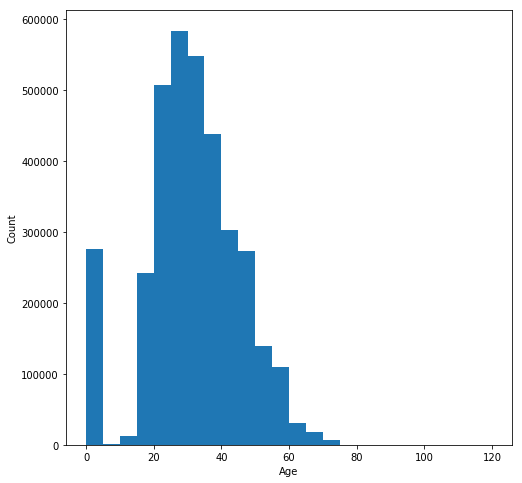

In [32]:
#Plotting a histogramm for the age distribution
bins = np.arange(0, df_clean['age'].max() + 5, 5)

plt.figure(figsize = (8, 8))
plt.hist(data = df_clean, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looks like the age distribution is slightly skewed to the right with most people between 20 and 50 years. This is actually an uncommon age distribution for chronic illnesses. We can see that most people >70 are not tracking their conditions using an app. 

**7. Top 20 Conditions**

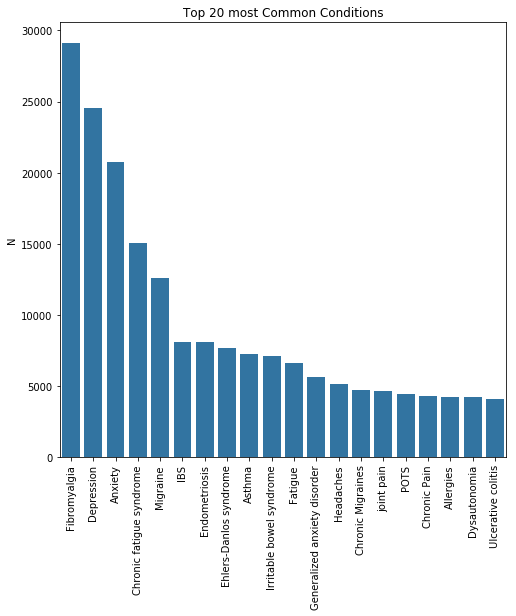

In [33]:
#Plotting the distribution of the most common conditions, copy pasta from 3rd and 5th exploration
x_value = df_clean[df_clean.trackable_type == "Condition"].trackable_name.value_counts().iloc[0:20]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation = 90)
plt.ylabel('N')
plt.title('Top 20 most Common Conditions')
plt.show()

It is not surprising to see fibromyalgia, depression and anxiety as the top 3 conditions in regards of the age distribution above. All of these most often manifest under the age of 50.

**9. WordCloud of most eaten foods**

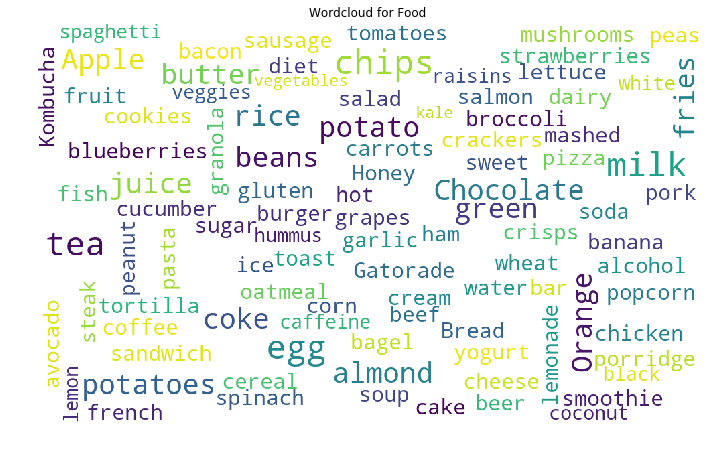

In [34]:
#A keggle kernel used a WordCloud, I wanted to try creating one myself with the guidance of ...
names = df_clean[df_clean.trackable_type == 'Food'].trackable_name.value_counts().iloc[0:100].index

wc = WordCloud(max_font_size=50, width=1000, height=600, background_color = 'white').generate(' '.join(names))

plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.title('Wordcloud for Food')
plt.axis('off')
plt.show() 

**10. Most common Symptoms**

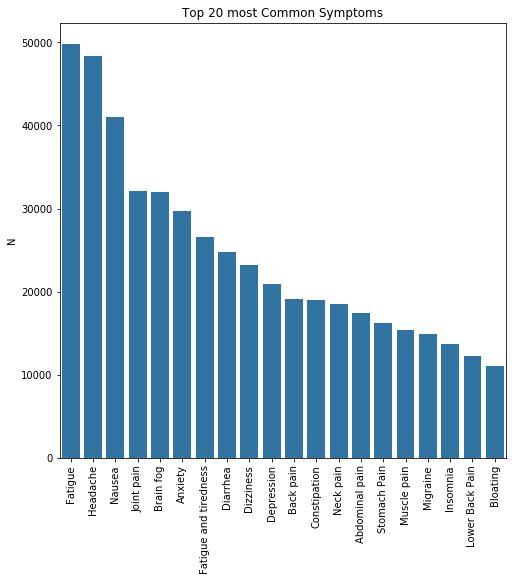

In [35]:
x_value = df[df.trackable_type == "Symptom"].trackable_name.value_counts().iloc[0:20]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation = 90)
plt.ylabel('N')
plt.title('Top 20 most Common Symptoms')
plt.show()

### Exploring Fibromyalgia

Now we have a good general impression on how most chronic illness patients in this age group behave. An interesting factor about this dataset is its ability to choose one illness and track it. From now on I will focus on Fibromyalgia for further analysis and try to find some features of the disease hidden in this dataset. I choose Fibromyalgia because we have the most data for it and because it is associated with specific symptoms that we can explore.

In [36]:
#select all user_id with Fibromyalgia and save them to an array (3)
user_fibro = df_clean.loc[df_clean['trackable_name'] == 'Fibromyalgia', 'user_id']
user_fibro = user_fibro.drop_duplicates().values

#create a new df where user_id matches the array
df_fibro = df_clean.loc[df_clean['user_id'].isin(user_fibro)]
df_fibro.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
290,21946,0,NaN,NaN,2015-05-25,350,Condition,Ehlers-Danlos syndrome,0
291,21946,0,NaN,NaN,2015-05-25,397,Condition,Fibromyalgia,0
292,21946,0,NaN,NaN,2015-05-25,561,Condition,Irritable bowel syndrome,0
293,21946,0,NaN,NaN,2015-05-25,1131,Condition,Chronic Migraines,1
294,21946,0,NaN,NaN,2015-05-25,1,Symptom,Abdominal pain,0


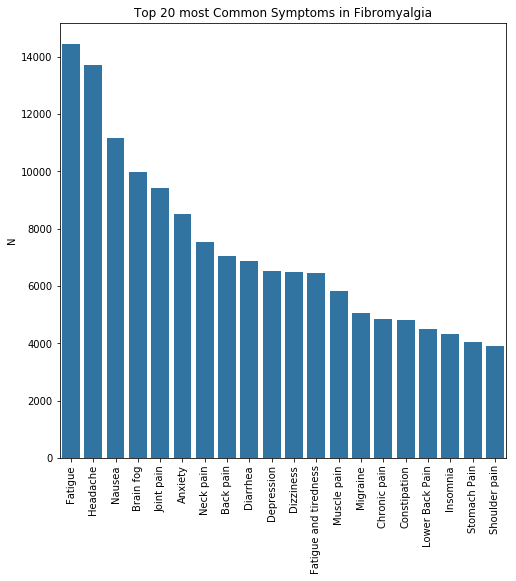

In [37]:
x_value = df_fibro[df_fibro.trackable_type == "Symptom"].trackable_name.value_counts().iloc[0:20]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation = 90)
plt.ylabel('N')
plt.title('Top 20 most Common Symptoms in Fibromyalgia')
plt.show()

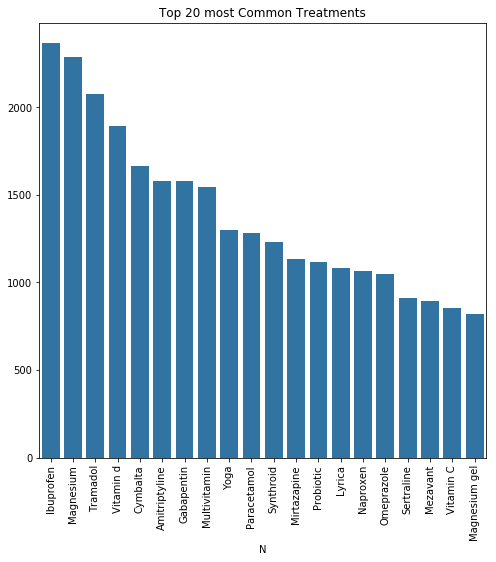

In [38]:
x_value = df_fibro[df_fibro.trackable_type == "Treatment"].trackable_name.value_counts().iloc[0:20]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.index, y = x_value.values, color = base_color)
plt.xticks(rotation=90)
plt.xlabel('N')
plt.title("Top 20 most Common Treatments")
plt.show()

<a id='bi'></a>
### Bi- and Multivariate Exploration:

**10. Relationship of Age and Pain**

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487633 entries, 0 to 3487632
Data columns (total 9 columns):
user_id            int16
age                int32
sex                object
country            object
checkin_date       datetime64[ns]
trackable_id       object
trackable_type     object
trackable_name     object
trackable_value    object
dtypes: datetime64[ns](1), int16(1), int32(1), object(6)
memory usage: 206.2+ MB


C:\Users\march\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


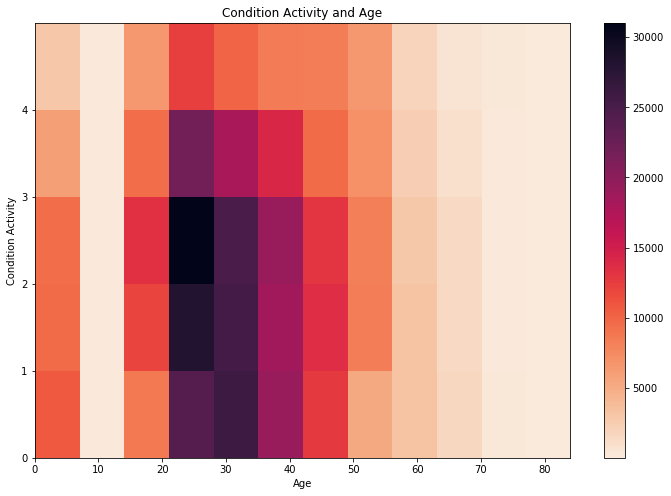

In [40]:
#Setting a filter df to exclude false values in trackable_value
filter_set = df_clean[df_clean['trackable_type'] == 'Condition']
filter_set['trackable_value'] = filter_set['trackable_value'].astype(int)

bins_x = np.arange(0, 80 + 7, 7)
bins_y = np.arange(0, 5+1, 1)

plt.figure(figsize = (12, 8))
plt.hist2d(data = filter_set, x = 'age', y = 'trackable_value', bins = [bins_x, bins_y], cmap = 'rocket_r')
plt.colorbar()
plt.yticks([0, 1, 2, 3, 4])
plt.xlabel('Age')
plt.ylabel('Condition Activity')
plt.title('Condition Activity and Age')
plt.show()

C:\Users\march\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


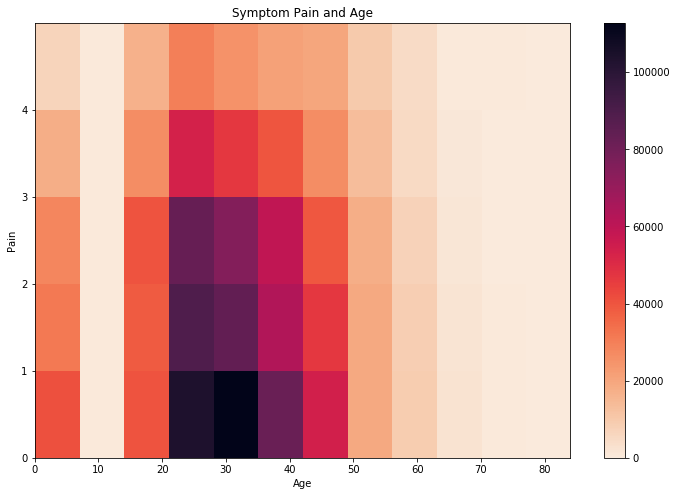

In [41]:
#Pain Index as y
filter_set2 = df_clean[df_clean['trackable_type'] == 'Symptom']
filter_set2['trackable_value'] = filter_set2['trackable_value'].astype(int)

bins_x = np.arange(0, 80 + 7, 7)
bins_y = np.arange(0, 5+1, 1)

plt.figure(figsize = (12, 8))
plt.hist2d(data = filter_set2, x = 'age', y = 'trackable_value', bins = [bins_x, bins_y], cmap = 'rocket_r')
plt.colorbar()
plt.yticks([0, 1, 2, 3, 4])
plt.xlabel('Age')
plt.ylabel('Pain')
plt.title('Symptom Pain and Age')
plt.show()

**11. Comparing Condition activity and Pain**

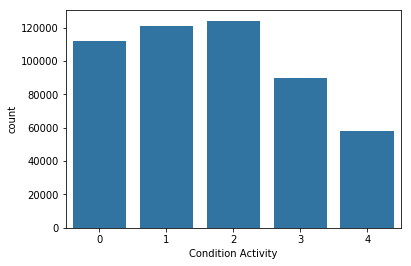

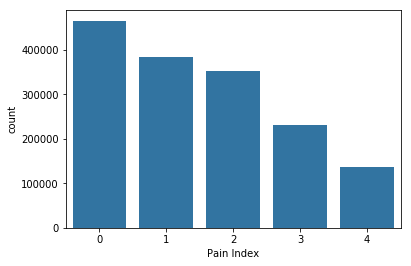

In [42]:
x_value = df_clean[df_clean['trackable_type'] == 'Condition'].trackable_value
hue_value = df_clean[df_clean['trackable_type'] == 'Symptom'].trackable_value


sns.countplot(x = x_value, data = df_clean, color = base_color)
plt.xlabel('Condition Activity')
plt.show()

plt.subplot()
sns.countplot(x = hue_value, data = df_clean, color = base_color)
plt.xlabel('Pain Index')
plt.show()

C:\Users\march\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


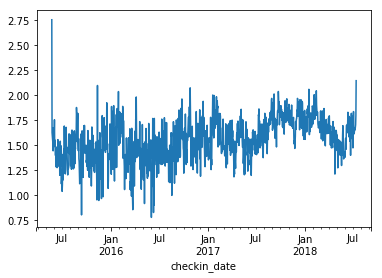

In [43]:
#Applying a filter for plotting the pain score in the symptom type
filter_set3 = df_fibro[df_fibro['trackable_type'] == 'Symptom']
filter_set3['trackable_value'] = filter_set3['trackable_value'].astype(int)
#Grouping pain score by date and calculating the mean for this day(4)
filter_set3 = filter_set3['trackable_value'].groupby(filter_set3['checkin_date']).mean()

#plotting a lineplot
filter_set3.plot.line(x = 'checkin_date', y = 'trackable_value');

C:\Users\march\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


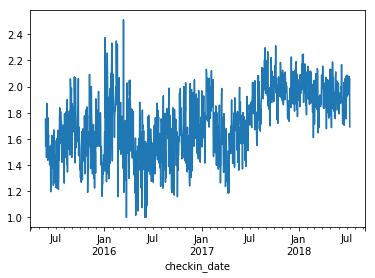

In [44]:
#Applying a filter for plotting the pain score in the symptom type
filter_set4 = df_fibro[df_fibro['trackable_type'] == 'Condition']
filter_set4['trackable_value'] = filter_set4['trackable_value'].astype(int)
#Grouping pain score by date and calculating the mean for this day(4)
filter_set4 = filter_set4['trackable_value'].groupby(filter_set4['checkin_date']).mean()

#plotting a lineplot
filter_set4.plot.line(x = 'checkin_date', y = 'trackable_value');

It is interesting to see that the symptoms seem to peak during winter. The overall change is somewhere around .5 which probably is a relevant change. The first few entries look like they can be ignored.

<a id='sources'></a>
# Sources

- The Dataset: https://www.kaggle.com/flaredown/flaredown-autoimmune-symptom-tracker
- (1) Changing alphanumerical to integer: https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/32011969
- (2) Conditional replacement of values: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
- (3) Creating new df from list: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
- (4) Groupby: https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/